# Importing Necessary Libraries

In [83]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import cv2
import pandas as pd
import numpy as np

In [18]:
SAMPLE_LEN = 100
IMAGE_PATH = '../input/cassava-leaf-disease-classification/train_images'
TRAIN_PATH = '../input/cassava-leaf-disease-classification/train.csv'

train_df = pd.read_csv(TRAIN_PATH)

In [19]:
train_df.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [22]:
id2lbl = {0:"Cassava Bacterial Blight (CBB)",
         1:"Cassava Brown Streak Disease (CBSD)",
         2:"Cassava Green Mottle (CGM)",
         3:"Cassava Mosaic Disease (CMD)",
         4:"Healthy"
         }
train_df['label'] = train_df['label'].map(id2lbl)

In [26]:
train_df = train_df.sample(frac=1).reset_index(drop=True) #Shuffling the dataframe
train_df.head()

image_id                           label
0  1906106521.jpg                         Healthy
1  3205165267.jpg    Cassava Mosaic Disease (CMD)
2  3049457065.jpg    Cassava Mosaic Disease (CMD)
3  2294473726.jpg    Cassava Mosaic Disease (CMD)
4  1332424855.jpg  Cassava Bacterial Blight (CBB)

# Visualizing Images

In [40]:
def show_images(image_ids):
    
    row, col = 3, 3
    fig, ax = plt.subplots(row, col, figsize=(16,16))
    ax = ax.flatten()
    
    for i,image_id in enumerate(image_ids):
        img = cv2.imread(IMAGE_PATH + f'/{image_id}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax[i].set_axis_off()
        ax[i].imshow(img)
        ax[i].set_title(train_df[train_df['image_id'] == image_id]['label'].values[0])

## Random Images

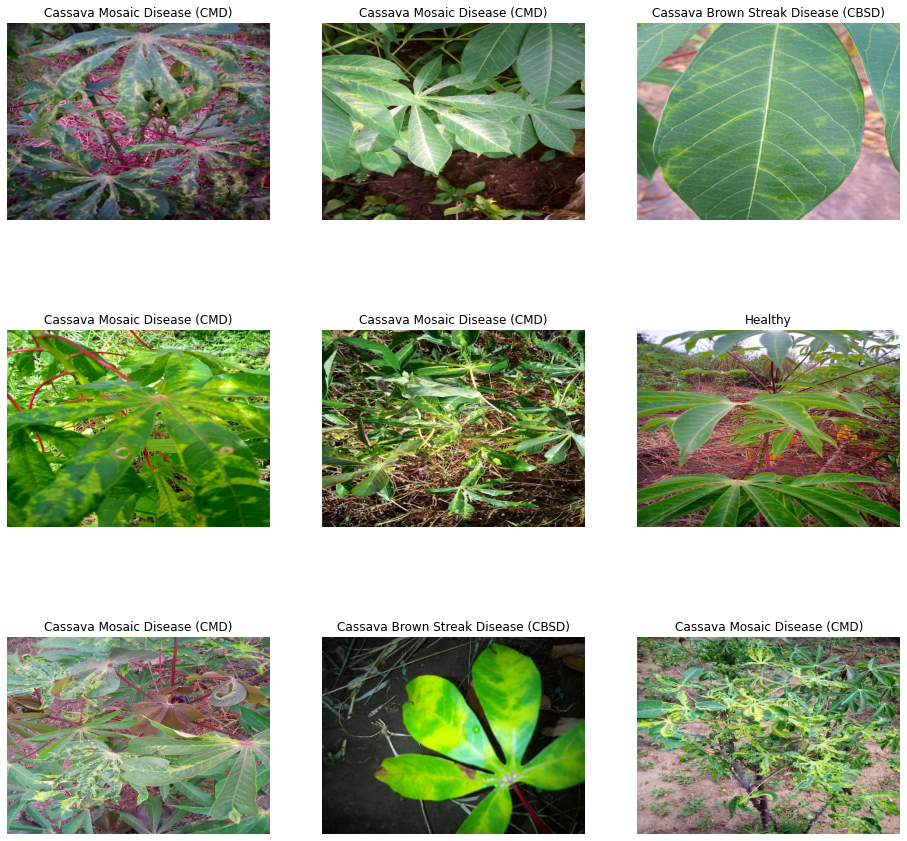

In [41]:
show_images(train_df.sample(n=9)['image_id'].values)

## Cassava Bacterial Blight (CBB)

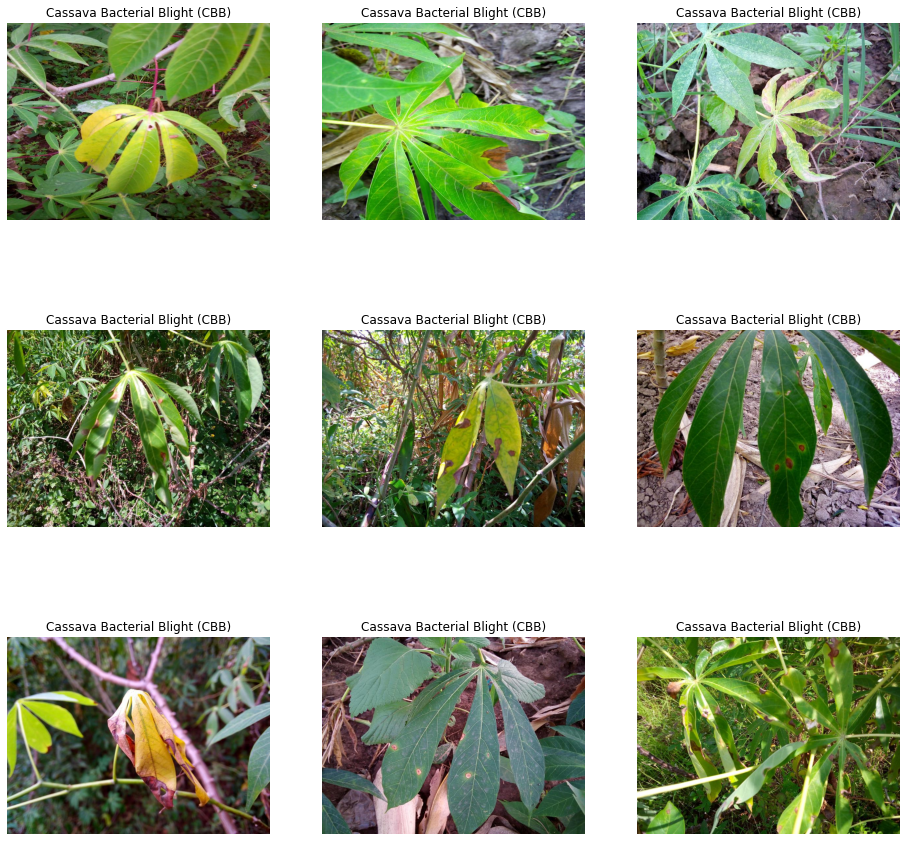

In [42]:
show_images(train_df[train_df['label'] == "Cassava Bacterial Blight (CBB)"].sample(n=9)['image_id'].values)

## Cassava Brown Streak Disease (CBSD)

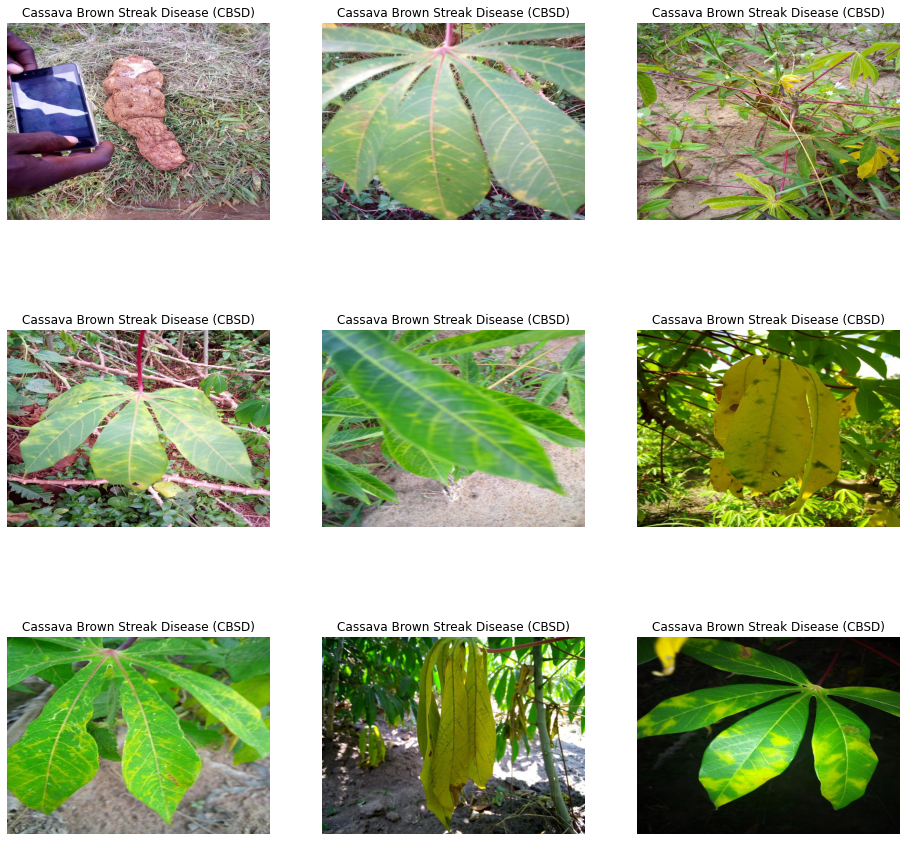

In [43]:
show_images(train_df[train_df['label'] == "Cassava Brown Streak Disease (CBSD)"].sample(n=9)['image_id'].values)

## Cassava Green Mottle (CGM)

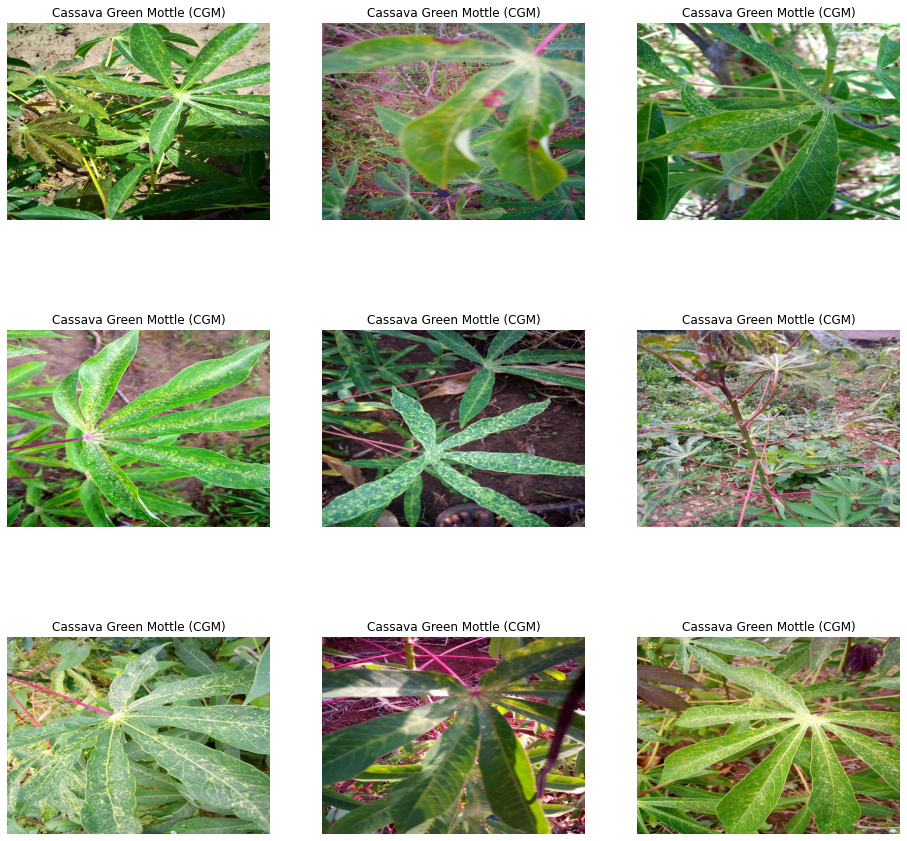

In [44]:
show_images(train_df[train_df['label'] == "Cassava Green Mottle (CGM)"].sample(n=9)['image_id'].values)

## Cassava Mosaic Disease (CMD)

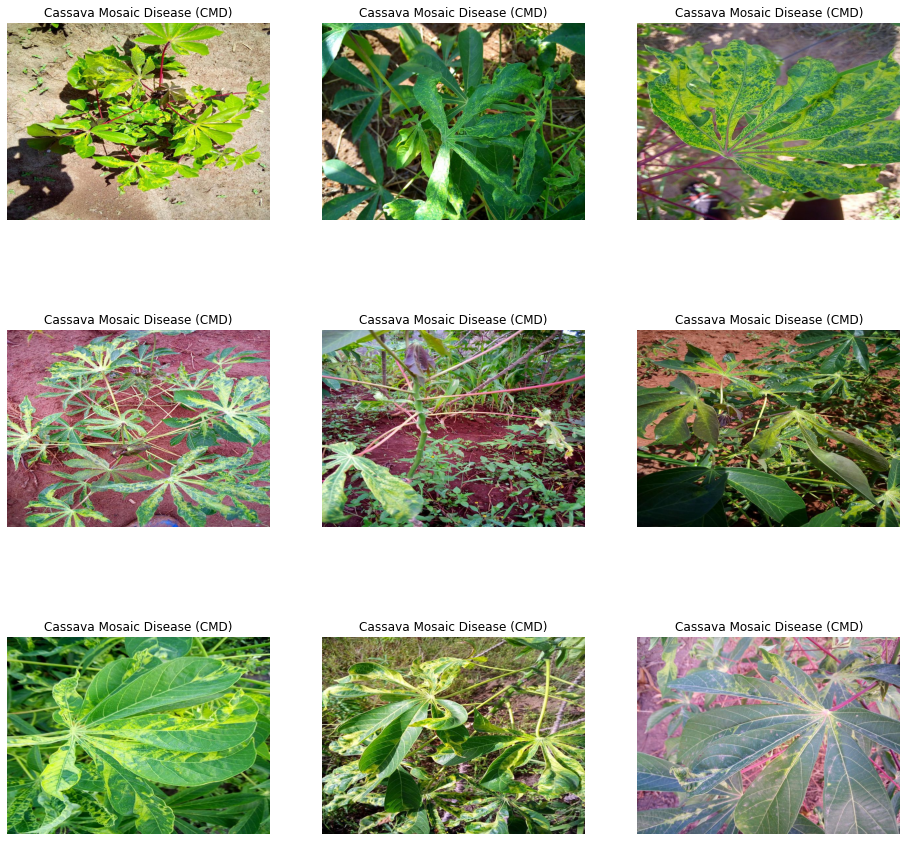

In [45]:
show_images(train_df[train_df['label'] == "Cassava Mosaic Disease (CMD)"].sample(n=9)['image_id'].values)

## Healthy

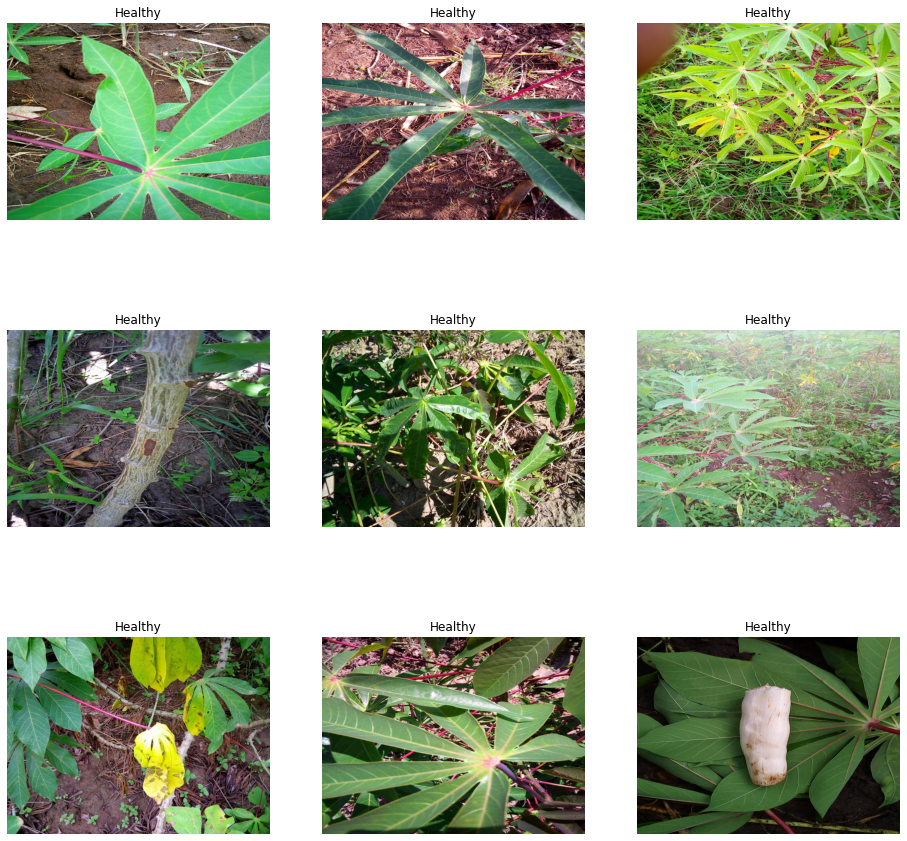

In [46]:
show_images(train_df[train_df['label'] == "Healthy"].sample(n=9)['image_id'].values)

Looking at the images it seems that there are few images having two different labels which means the dataset is noisy

In [62]:
def get_values(lbl):
    return (train_df['label'] == lbl).sum()

In [67]:
labels = ["Cassava Bacterial Blight (CBB)","Cassava Brown Streak Disease (CBSD)","Cassava Green Mottle (CGM)",
          "Cassava Mosaic Disease (CMD)","Healthy"]
values = [get_values(x) for x in labels]

In [74]:
fig = go.Figure([go.Pie(labels=labels,values=values)])
fig.update_layout(title_text="Pie chart of diseases", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0,0,0)'
fig.data[0].marker.line.width = 0.5
fig.show()

The above pie chart shows that the data is highly imbalanced. 61.5% of images are of Cassave Mosaic Disease(CMD) where as only 5.08% of images are of Cassava Bacterial Blight(CBB)

In [78]:
def load_image(image_id):
    image = cv2.imread(IMAGE_PATH + f'/{image_id}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
train_images = train_df['image_id'][:SAMPLE_LEN].apply(load_image)

# Channel Distribution

In [84]:
red_values = [np.mean(train_images[idx][:,:,0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[idx][:,:,1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[idx][:,:,2]) for idx in range(len(train_images))]
values = [np.mean(train_images[idx]) for idx in range(len(train_images))]

In [90]:
def plot_channel(values, channel, color, title):
    fig = ff.create_distplot([values], group_labels=[channel], colors=[color])
    
    fig.update_layout(title_text=title, showlegend=False, template='simple_white')
    fig.data[0].marker.line.width = 0.5
    fig.data[0].marker.line.color = 'rgb(0,0,0)'
    return fig

## All Channel

In [91]:
plot_channel(values=values, channel='Channel', color='purple', title='All Channel Distribution')

In [92]:
plot_channel(values=red_values, channel='R', color='red', title='Red Channel Distribution')

In [93]:
plot_channel(values=green_values, channel='G', color='green', title='Green Channel Distribution')

In [94]:
plot_channel(values=blue_values, channel='B', color='blue', title='Blue Channel Distribution')

From the above channel distributions its clear that all color channel has almost same distribution except red channel is more pronounced in the image